# Classifying Hatred-Related Tweets 

# Import Basic Libraries


In [1]:
import sklearn
import numpy as np
import pandas as pd

# Import Data

In [2]:
# training data
train = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\Webdev\sample_data\train.csv")

# test data
test = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\Webdev\sample_data\test.csv")


# Data Exploration 

In [7]:
train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [8]:
test.tail()

,id,tweet
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


In [9]:
# non-racial/sexist related tweets
sum(train["label"] == 0)

29720

In [10]:
# racial/sexist related tweets
sum(train["label"] == 1)

2242

In [11]:
#check if there are any missing values
#train.isnull().values.any() #returns false if there are no missing values
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [12]:
# install tweet-preprocessor to clean tweets
%pip install tweet-preprocessor

Note: you may need to restart the kernel to use updated packages.


In [13]:
# remove special characters using the regular expression library

import re

#set up punctuations we want to be replaced

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [14]:
import preprocessor as p

# custum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_tweets(df):
  tempArr = []
  for line in df:
    # send to tweet_processor
    tmpL = p.clean(line)
    # remove puctuation
    tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
    tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr

In [15]:
# clean training data
train_tweet = clean_tweets(train["tweet"])
train_tweet = pd.DataFrame(train_tweet)
     

In [18]:
# append cleaned tweets to the training data
train["clean_tweet"] = train_tweet

# compare the cleaned and uncleaned tweets
train.head(50)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i cant use cause they dont o...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now
5,6,0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare and big talking before they ...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here im its so


In [19]:
# clean the test data and append the cleaned tweets to the test data
test_tweet = clean_tweets(test["tweet"])
test_tweet = pd.DataFrame(test_tweet)
# append cleaned tweets to the training data
test["clean_tweet"] = test_tweet

# compare the cleaned and uncleaned tweets
test.head(25)

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,to find
1,31964,@user #white #supremacists want everyone to s...,want everyone to see the new and heres why
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd to my amazing hilarious eli ahmir uncle dav...
5,31968,choose to be :) #momtips,choose to be
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...,something inside me dies eyes ness
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...,
8,31971,@user @user @user i will never understand why...,i will never understand why my dad left me whe...
9,31972,#delicious #food #lovelife #capetown mannaep...,mannaepicure


# Train and Test Split

In [20]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
# extract the labels from the train data
y = train.label.values

# use 70% for the training and 30% for the test
train_X, test_X, train_y, test_y = train_test_split(train.clean_tweet.values, y, 
                                                    stratify=y, 
                                                    random_state=1, 
                                                    test_size=0.3, shuffle=True)

In [21]:
# import dependency
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize tweets using CountVectorizer (SAMPLE)

In [22]:
documents = ["This is Import Data's Youtube channel",
             "Data science is my passion and it is fun!",
             "Please subscribe to my channel"]

# initializing the countvectorizer
vectorizer = CountVectorizer()

# tokenize and make the document into a matrix
document_term_matrix = vectorizer.fit_transform(documents)

# check the result
pd.DataFrame(document_term_matrix.toarray(), columns = vectorizer.get_feature_names_out())

,and,channel,data,fun,import,is,it,my,passion,please,science,subscribe,this,to,youtube
0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1
1,1,0,1,1,0,2,1,1,1,0,1,0,0,0,0
2,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0


# Vectorize tweets using CountVectorizer(ACTUAL)

In [26]:
# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(train_X) + list(test_X))

# transform documents to document-term matrix
x_train_vec = vectorizer.transform(train_X)
x_test_vec = vectorizer.transform(test_X)

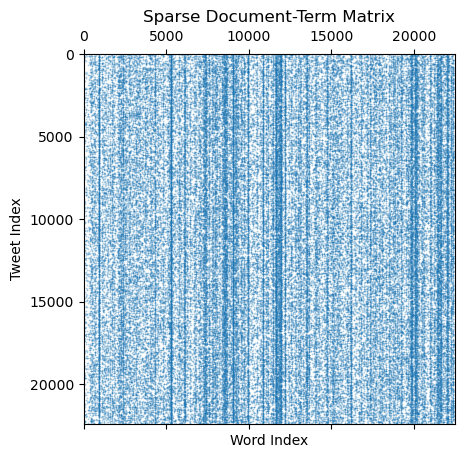

In [24]:
#from chatGPT own code

from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt

# assume x_train_vec has already been generated using CountVectorizer

# plot the data points in x_train_vec
plt.spy(x_train_vec, markersize=0.1)

# add axis labels and a title
plt.xlabel('Word Index')
plt.ylabel('Tweet Index')
plt.title('Sparse Document-Term Matrix')

# display the plot
plt.show()

# Model Building

In [28]:
from sklearn import svm
# classify using support vector classifier
svm = svm.SVC(kernel = 'linear', probability=True)

# fit the SVC model based on the given training data
prob = svm.fit(x_train_vec, train_y).predict_proba(x_test_vec)

# perform classification and prediction on samples in x_test
y_pred_svm = svm.predict(x_test_vec)

# Accuracy score for SVC

In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy score for SVC is: ", accuracy_score(test_y, y_pred_svm) * 100, '%')

Accuracy score for SVC is:  94.86912086766085 %
